<a href="https://colab.research.google.com/github/pinipv/DeepLearning-LearningPropio/blob/main/Copia_de_Copia_de_clasificacion_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from os import listdir
from skimage import io



from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


In [ ]:
!unrar x -Y "/content/data.rar" "/content/imageness"

In [ ]:
import cv2
path = '/content/imageness/data/'
directories = listdir(path)

imagenes = []
labels= []

#### para cada directorio dentro de data listamos su interior(imagenes)
for directori in directories:

#### listamos cada imagen
    for i in range(0,len(listdir(path + directori))):
        
#### obtenemos cada ruta de la imagen y la leemos guardando asi la imagen
        image = cv2.imread(path + directori + '/' + listdir(path + directori)[i])
        
#### Añadimos cara imagen al array junto con su etiqueta en formato tupla    
        image_resized = cv2.resize(image, (32,32))  
        imagenes.append(np.array(image_resized)) 
        labels.append(str(directori))
        
        ####plt.imshow(image,vmin=0,vmax=1)
    



In [ ]:
X = np.array(imagenes)
y = np.array(labels)

In [ ]:
print(X.shape)
print(y.shape)

(6899, 32, 32, 3)
(6899,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


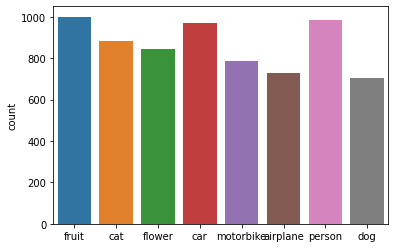

In [ ]:
g = sns.countplot(y)

In [ ]:
X_standarized = X.astype('float32')/255

from sklearn.preprocessing import LabelEncoder


y_encoded = LabelEncoder().fit_transform(y)
y_categorical = tf.keras.utils.to_categorical(y_encoded)

In [ ]:
print(X_standarized.shape)
print(y_categorical.shape)

(6899, 32, 32, 3)
(6899, 8)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_standarized, y_categorical, test_size=0.2, random_state=42)

In [ ]:
classes = y_train.unique()
coding= {}
j=0
for i in classes:
  coding[i]=j
  j+=1
coding

{'airplane': 2,
 'car': 3,
 'cat': 4,
 'dog': 0,
 'flower': 5,
 'fruit': 1,
 'motorbike': 7,
 'person': 6}

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5519, 32, 32, 3)
(1380, 32, 32, 3)
(5519, 8)
(1380, 8)


In [53]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (100,100,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))

In [54]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

eS = EarlyStopping(monitor = 'loss',
                   mode='min',
                   patience = 5,
                   verbose = 1,
                   restore_best_weights = True)

In [ ]:
history = model.fit(X_train,y_train, validation_split = 0.2, verbose=1, epochs = 25, callbacks=[eS])

Epoch 1/25
138/138 [==============================] - 48s 344ms/step - loss: 1.2403 - accuracy: 0.5472 - val_loss: 0.6647 - val_accuracy: 0.7681
Epoch 2/25
138/138 [==============================] - 45s 326ms/step - loss: 0.6027 - accuracy: 0.7875 - val_loss: 0.4284 - val_accuracy: 0.8379
Epoch 3/25
138/138 [==============================] - 44s 320ms/step - loss: 0.4525 - accuracy: 0.8378 - val_loss: 0.4639 - val_accuracy: 0.8333
Epoch 4/25
138/138 [==============================] - 44s 316ms/step - loss: 0.3795 - accuracy: 0.8593 - val_loss: 0.3115 - val_accuracy: 0.8696
Epoch 5/25
138/138 [==============================] - 43s 314ms/step - loss: 0.3252 - accuracy: 0.8786 - val_loss: 0.3044 - val_accuracy: 0.8813
Epoch 6/25
138/138 [==============================] - 43s 314ms/step - loss: 0.2685 - accuracy: 0.9046 - val_loss: 0.3018 - val_accuracy: 0.8832
Epoch 7/25
138/138 [==============================] - 45s 325ms/step - loss: 0.2469 - accuracy: 0.9051 - val_loss: 0.2827 - val_ac

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location ' best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


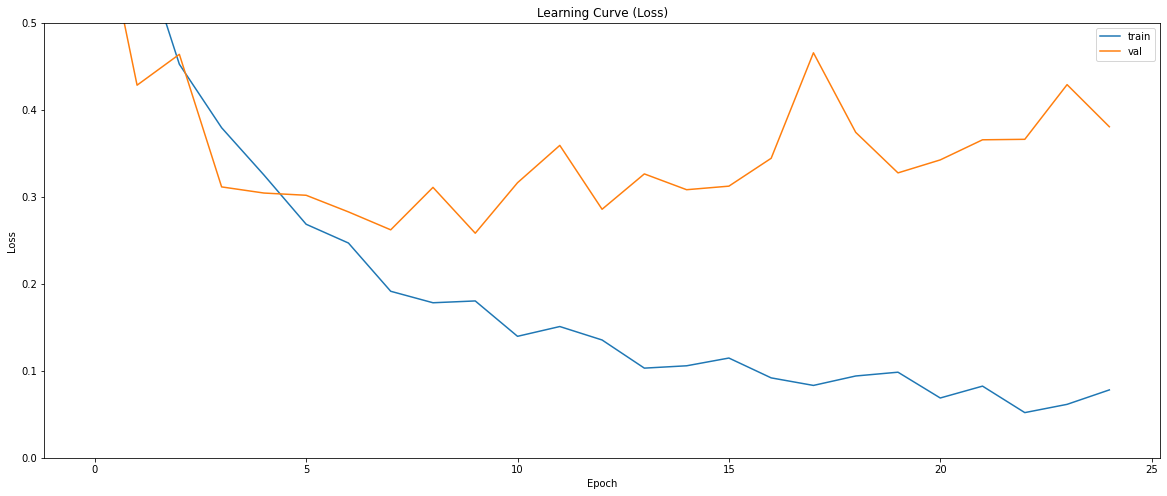

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0,0.5)
ax.legend(['train','val'], loc = ' best')
plt.show()

In [ ]:
prediccion = model.evaluate(X_test, y_test)

44/44 [==============================] - 3s 71ms/step - loss: 0.4405 - accuracy: 0.8884


0.88 con sigmoid igual con softmax

In [ ]:
prediccion[1]*100

88.84057998657227

# Hasta este punto queda un módelo simple, rudo y poco optimizado. Que además presenta overfitting

### Recogemos de nuevo la lectura de imagenes y labels

In [ ]:
X = np.array(imagenes)
y = np.array(labels)

In [ ]:
#### Generar imágenes desde el directorio

'''
from tensorflow.keras.preprocessing.image import ImageDataGenerator

imag = ImageDataGenerator( rescale = 1.0/255.)
imagens = imag.flow_from_directory(imagen_dir, batch_size = 20, class_mode = 'binary'¿? , target_size = (100,100))
'''


### Estandarizamos los 'pixeles' de las imágenes y categorizamos las 'labels'

In [ ]:
X_standarized = X.astype('float32')/255

from sklearn.preprocessing import LabelEncoder

### Esto tendremos que hacerlo despues del data_augmentin
y_encoded = LabelEncoder().fit_transform(y)
y_categorical = tf.keras.utils.to_categorical(y_encoded)

### Modelo

In [34]:
from keras.layers.pooling import MaxPooling2D
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(4, activation = 'sigmoid'))

In [ ]:
model.summary()

In [35]:
from tensorflow.keras.optimizers import RMSprop


model.compile(optimizer = RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
### Agrupación de paquetes de imágenes
'''batch_size = 20  

steps_per_epoch = imagenes_train.n // batch_size  ### .n dará, supongo el numero de imágenes
validation_steps = imagenes_validation.n // batch_size 

history= model.fit(
    imagenes_train,
    steps_per_epoch= steps_per_epoch,
    epochs = 100,
    validation_data = imagenes_validation,
    validation_steps = validation_steps,
    verbose = 2
)
'''

In [ ]:
history = model.fit(...)    ### los '...' son porque está sin rellenar

## Visualizar comportamiento del entrenamiento

In [61]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [62]:

history_dict = history.history
acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

In [58]:
test_loss, test_acc = model.evaluate(test, test_lab)
print('Test Accuracy:',test_acc)

57/57 [==============================] - 30s 530ms/step - loss: 1.0284 - accuracy: 0.6389
Test Accuracy: 0.6388583779335022


## Mejores formas de prevenir el overfitting

- #### Dropout(obviar aleatoriamente ciertas neuronas en cada época)
- #### Regularización de pesos L1 o L2(se añaden a nivel de capa con kerne_regularizer con keras.regularizers.l1(r) o keras.regularizers.l2(r), siendo r es un float que controla la regularización aplicada
- #### Data Augmentation(Expuesta abajo)
- #### Transfer Learning(Utilizar modelos ya entrenados previamente con otros datos

#### Data Augmentation
##### Aumentar 'artificialmente' la cantidad de datos generando mas imágenes a partir de las que están en posesion(rotandolas, girándolas, moviendo el eje horizontal o vertical de la imagen, etc)


##### Esto solo se hará en los datos de entrenamiento, no en test ni en validacion

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range= 40,   ### Maximo valor de rotacion de la imagen
    width_shift_range = 0.2,
    height_shift_range = 0.2
)



## Aqui generamos imagenes adicionales a partir de cada imagen

##### Este codigo da como resultado final imagenes en formato tensor 3D de (100, 100, 3)

In [ ]:
from keras_preprocessing.image.utils import img_to_array
from numpy.lib.shape_base import expand_dims
from google.colab import files
from tensorflow.keras.preprocessing import image

from tensorflow.keras import layers


def Augmentation():

  uploades = files.upload()  #### Este método permite subir archivos a colab(carpeta content)
  lista_imagenes=[]

  for fn in uploades.keys():
    path = '/content/' + fn
    img = image.load_img(path)
    data = image.img_to_array(img)
    samples = expand_dims(data, 0)

    generador = train_datagen

    #### .flow devuelve una tupla con(x,y) siendo x la imagen e y la label o etiqueta((En caso de pasar tambien un argumento y con las labels))
    it = generador.flow(samples, batch_size=1, save_to_dir='/content/g/')
    #### Solo se crean las imagenes cuando se hace it.next()
    for i in range(3):   #### Luego este rango determinará cuantas imágenes se crean
      batch = it.next()
      imag = batch[0]
      imagenn= img_to_array(imag)

      #### Reescalamos la imagen a un formato de (100 x 100)
      IMG_SIZE = 100

      resize_and_rescale = tf.keras.Sequential([
        layers.Resizing(IMG_SIZE, IMG_SIZE)
      ])

      result = resize_and_rescale(imagenn)
      lista_imagenes.append(result)
  return lista_imagenes
  
  


In [ ]:
from keras_preprocessing.image.utils import img_to_array
from numpy.lib.shape_base import expand_dims
from google.colab import files
from tensorflow.keras.preprocessing import image

from tensorflow.keras import layers
import cv2

path = '/content/imageness/data/'
#directories = listdir(path)

def Augmentation(path,directories,copias):

  ### Esta variable contendra mis imagenes
  lista_imagenes = []
  ### Esta contendra las labels equivalente
  y = []

 

  #### para cada directorio dentro de data listamos su interior(imagenes)
  for directori in directories:
      ### Esta variable contendrá las imagenes de base
      imagenes = []
      #### listamos cada imagen
      for i in range(0,len(listdir(path + directori))):
          
          #### obtenemos cada ruta de la imagen y la leemos guardando asi la imagen
          image = cv2.imread(path + directori + '/' + listdir(path + directori)[i])
          
          #### Añadimos cara imagen al array de imagenes base    
          image_resized = cv2.resize(image, (100,100))  
          imagenes.append(np.array(image_resized)) 

          #### Añadimos cada label de la imagen a la lista de labels(y) definitiva
          y.append(str(directori))
          
      imagenes = np.array(imagenes)

      ### Agregamos a la lista definitiva las imagenes base estandarizadas de un directorio
      lista_imagenes.append((np.array(imagenes).astype('float32')/255))
        
      for i in imagenes:
        
          generador = train_datagen
          generador.fit(imagenes)
          it = generador.flow(imagenes, batch_size=1, save_to_dir='/content/'+str(directori)+'/')
          #### Solo se crean las imagenes cuando se hace it.next()
          for i in range(int(copias)):   #### Luego este rango determinará cuantas imágenes se crean
            batch = it.next()
            imag = batch[0]
            imagenn= img_to_array(imag)

            #### Reescalamos la imagen a un formato de (100 x 100)
            IMG_SIZE = 100

            resize_and_rescale = tf.keras.Sequential([
              layers.Resizing(IMG_SIZE, IMG_SIZE)
            ])

            result = resize_and_rescale(imagenn)

        #### Añadimos la imagen y el label a las listas definitivas
            lista_imagenes.append(result)
            y.append(str(directori))
      
  #### Devolvemos en formato tupla la lista con todas las imagenes y la tupla con todos los labels
  
  return (lista_imagenes,y)
    
  

In [ ]:
(X_augmentate, y_augmentate) = Augmentation(path, directories, 3)

# Vamos a hacerlo separado por directorios

In [ ]:
from tensorflow.keras.preprocessing import image

### Esta variable contendrá las imagenes de base
imagenes = []
lista_imagenes= []
y = []
uploades = files.upload()  #### Este método permite subir archivos a colab(carpeta content)


for fn in uploades.keys():
    path = '/content/' + fn
    img = image.load_img(path)

    imagenes.append(img)

for i in range(0,len(imagenes)):
          
          #### obtenemos cada ruta de la imagen y la leemos guardando asi la imagen
          ima = np.array(imagenes[i])
          
          #### Añadimos cara imagen al array de imagenes base    
          image_resized = cv2.resize(ima, (100,100))  
          imagenes.append(np.array(image_resized)) 

          #### Añadimos cada label de la imagen a la lista de labels(y) definitiva
          y.append(str('airplane'))
          
imagenes = np.array(imagenes)
print(imagenes)

      ### Agregamos a la lista definitiva las imagenes base estandarizadas de un directorio
lista_imagenes.append(imagenes.astype('float32')/255)
       
for i in imagenes:
        
          generador = train_datagen
          generador.fit(imagenes)
          it = generador.flow(imagenes, batch_size=1, save_to_dir='/content/'+str('airplan')+'/')
          #### Solo se crean las imagenes cuando se hace it.next()
          for i in range(int(3)):   #### Luego este rango determinará cuantas imágenes se crean
            batch = it.next()
            imag = batch[0]
            imagenn= img_to_array(imag)

            #### Reescalamos la imagen a un formato de (100 x 100)
            IMG_SIZE = 100

            resize_and_rescale = tf.keras.Sequential([
              layers.Resizing(IMG_SIZE, IMG_SIZE)
            ])

            result = resize_and_rescale(imagenn)

        #### Añadimos la imagen y el label a las listas definitivas
            lista_imagenes.append(result)
            y.append(str('airplane'))
      
  #### Devolvemos en formato tupla la lista con todas las imagenes y la tupla con todos los labels
  

    

In [5]:
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import cv2


def obtener_imagenes(etiqueta):
      ### Esta variable contendrá las imagenes de base
      imagenes = []
      imagenes_base = []

      y = []
      uploades = files.upload()  #### Este método permite subir archivos a colab(carpeta content)

      for fn in uploades.keys():
          path = '/content/' + fn
          img = image.load_img(path)

          imagenes_base.append(img)

      for i in range(0,len(imagenes_base)):
                
                #### obtenemos cada ruta de la imagen y la leemos guardando asi la imagen
                ima = np.array(imagenes_base[i])
                
                #### Añadimos cara imagen al array de imagenes base    
                image_resized = cv2.resize(ima, (100,100))  
                imagenes.append(image_resized)  #.astype('float32')/255)    ##Las formatearemos mas adelante

                #### Añadimos cada label de la imagen a la lista de labels(y) definitiva
                y.append(str(etiqueta))
                
      #imagenes = np.array(imagenes)
      #print(np.array(imagenes).shape)
      #print(imagenes[0].shape)
      return (imagenes, y)

      
       

In [ ]:
#### Deberia transformar todos en nparray?¿?¿?¿?

In [ ]:
airplanes, y_aviones = obtener_imagenes('airplane')
airplanes = np.array(airplanes)

In [ ]:
car, y_car = obtener_imagenes('car')
car = np.array(car)


In [ ]:
cat, y_cat = obtener_imagenes('cat')
cat = np.array(cat)

In [ ]:
dog, y_dog = obtener_imagenes('dog')
dog = np.array(dog)


In [ ]:
flower, y_flower = obtener_imagenes('flower')
flower = np.array(flower)

In [ ]:
fruit, y_fruit = obtener_imagenes('fruit')
fruit = np.array(fruit)


In [ ]:
motorbike, y_motorbike = obtener_imagenes('motorbike')
motorkibe = np.array(motorbike)

In [ ]:
person, y_person = obtener_imagenes('person')
person = np.array(person)

In [ ]:
#### Deberia de sacar al menos 200 o 300 registros de cada uno para usar en test

In [10]:
from keras_preprocessing.image.utils import img_to_array
import tensorflow as tf
from tensorflow.keras import layers

def obtener_copias(imagenes_base, etiqueta,copias):
      lista_imagenes = []
      y = []
      generador = train_datagen
      generador.fit(imagenes_base)
      

      for i in imagenes_base:  
              imagen = np.array(i).reshape(-1,100,100,3)  
              it = generador.flow( imagen , batch_size=1)     
              #### Solo se crean las imagenes cuando se hace it.next()
              for j in range(int(copias)):   #### Luego este rango determinará cuantas imágenes se crean
                batch = it.next()
                imag = batch[0]
                imagenn= img_to_array(imag)

                #### Reescalamos la imagen a un formato de (100 x 100)
                IMG_SIZE = 100

                resize_and_rescale = tf.keras.Sequential([
                  layers.Resizing(IMG_SIZE, IMG_SIZE)
                ])

                result = resize_and_rescale(imagenn)

            #### Añadimos la imagen y el label a las listas definitivas
                lista_imagenes.append(result)
                y.append(str(etiqueta))
          
      #### Devolvemos en formato tupla la lista con todas las imagenes y la tupla con todos los labels
      return (lista_imagenes, y)

In [ ]:
airplanes.shape

(3, 100, 100, 3)

In [11]:
import matplotlib.pyplot as plt

generacion_aviones, y_generacion_aviones = obtener_copias(airplanes , 'airplane',3)



In [12]:
generacion_cars, y_generacion_cars = obtener_copias(car, 'car', 3)

In [13]:
generacion_cats, y_generacion_cats = obtener_copias(cat, 'cat', 3)

In [14]:
generacion_dogs, y_generacion_dogs = obtener_copias(dog, 'dog', 3)

In [16]:
generacion_flower, y_generacion_flower = obtener_copias(flower, 'flower', 3)

In [17]:
generacion_fruit, y_generacion_fruit = obtener_copias(fruit, 'fruit', 3)

In [18]:
generacion_motorbike, y_generacion_motorbike = obtener_copias(motorbike, 'motorbike', 3)

In [19]:
generacion_person, y_generacion_person = obtener_copias(person, 'person', 3)

In [ ]:
np.array(generacion_aviones).shape

(2181, 100, 100, 3)

In [15]:
avf = np.concatenate((airplanes, np.array(generacion_aviones)), axis=0)
labels_airplanes = np.concatenate((y_aviones, y_generacion_aviones), axis = 0)
lba = labels_airplanes.reshape(-1,1)

In [16]:
carsf= np.concatenate((car, np.array(generacion_cars)), axis = 0)
labels_cars = np.concatenate((y_car, y_generacion_cars), axis = 0)
lbcars = labels_cars.reshape(-1,1)

In [17]:
catsf = np.concatenate((cat, np.array(generacion_cats)), axis=0)
labels_cats = np.concatenate((y_cat,np.array(y_generacion_cats)), axis=0)
lbcats = labels_cats.reshape(-1,1)

In [18]:
dogsf = np.concatenate((dog, np.array(generacion_dogs)), axis=0)
labels_dogs = np.concatenate((y_dog,np.array(y_generacion_dogs)), axis=0)
lbdogs = labels_dogs.reshape(-1,1)

In [26]:
flowersf = np.concatenate((flower, np.array(generacion_flower)), axis=0)
labels_flowers = np.concatenate((y_flower,np.array(y_generacion_flower)), axis=0)
lbflowers = labels_flowers.reshape(-1,1)

In [27]:
fruitsf = np.concatenate((fruit, np.array(generacion_fruit)), axis=0)
labels_fruits = np.concatenate((y_fruit,np.array(y_generacion_fruit)), axis=0)
lbfruits = labels_fruits.reshape(-1,1)

In [28]:
motorbikesf = np.concatenate((motorbike, np.array(generacion_motorbike)), axis=0)
labels_motorbikes = np.concatenate((y_motorbike,np.array(y_generacion_motorbike)), axis=0)
lbmotorbikes = labels_motorbikes.reshape(-1,1)

In [29]:
personsf = np.concatenate((person, np.array(generacion_person)), axis=0)
labels_persons = np.concatenate((y_person,np.array(y_generacion_person)), axis=0)
lbpersons = labels_persons.reshape(-1,1)

In [19]:
from sklearn.utils import shuffle

def separar_train_test_labels(dataset, labels, seed): 

    #### 'Barajamos' los array de imagenes y de labels
    shuffle_dataset = shuffle(dataset, random_state = int(seed))
    shuffle_labels  = shuffle(labels, random_state = int(seed))

    a,b,c,d = np.vsplit(shuffle_dataset, 4)
    e,f,g,h = np.vsplit(shuffle_labels, 4)

    train_dataset = np.concatenate((a,b,c), axis=0)
    test_dataset  = d
    train_labels  = np.concatenate((e,f,g), axis= 0)
    test_labels   = h

    return (train_dataset, test_dataset, train_labels, test_labels)


#### Desarrollo funcion separar_train_test_labels

In [ ]:
from sklearn.utils import shuffle

#### 'Barajamos' los array de imagenes y de labels
tta = shuffle(avf, random_state = 42)
labavi = shuffle(lba, random_state = 42)

In [ ]:
#### Los partimos en 4 para dedicar 3/4 a train y 1/4 a test
a,b,c,d = np.vsplit(tta, 4)
e,f,g,h = np.vsplit(labavi, 4)


In [ ]:
#### Los juntamos segun esa relacion

train_aviones = np.concatenate((a,b,c), axis=0)
test_aviones  = d
labels_train_aviones = np.concatenate((e,f,g), axis= 0)
labels_test_aviones  = h

## Seguimos

In [20]:
train_aviones, test_aviones, labels_train_aviones, labels_test_aviones = separar_train_test_labels(avf, lba, 42)

In [21]:
train_cars, test_cars, labels_train_cars, labels_test_cars = separar_train_test_labels(carsf, lbcars, 40)

In [22]:
train_cats, test_cats, labels_train_cats, labels_test_cats = separar_train_test_labels(catsf, lbcats, 0)

In [23]:
train_dogs, test_dogs, labels_train_dogs, labels_test_dogs = separar_train_test_labels(dogsf, lbdogs, 2)

In [35]:
train_flowers, test_flowers, labels_train_flowers, labels_test_flowers = separar_train_test_labels(flowersf, lbflowers, 6)

In [36]:
train_fruits, test_fruits, labels_train_fruits, labels_test_fruits = separar_train_test_labels(fruitsf, lbfruits, 9)

In [37]:
train_motorbikes, test_motorbikes, labels_train_motorbikes, labels_test_motorbikes = separar_train_test_labels(motorbikesf, lbmotorbikes, 40)

In [1]:
train_persons, test_persons, labels_train_persons, labels_test_persons = separar_train_test_labels(personsf, lbpersons, 40)

NameError: ignored

In [ ]:
train_aviones.shape
labels_train_aviones.shape

(2181, 100, 100, 3)

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

def train_test_split(datasets_train, datasets_test, train_labels, test_labels):   #### Dataset y labels serian listas con todos los dataset y todos los labels
  train = datasets_train[0]
  test  = datasets_test[0]
  train_lab = train_labels[0]
  test_lab  = test_labels[0]

  for i in range(1, len(datasets_train)):
    train = np.concatenate((train, datasets_train[i]), axis = 0)
  for i in range(1, len(datasets_test)):
    test  = np.concatenate((test, datasets_test[i]),  axis = 0)
  for i in range(1, len(train_labels)):
    train_lab = np.concatenate((train_lab, train_labels[i]), axis = 0)
  for i in range(1, len(test_labels)):
    test_lab  = np.concatenate((test_lab, test_labels[i]),  axis = 0)


  train_lab_encoded = LabelEncoder().fit_transform(train_lab)
  train_lab_categorical = tf.keras.utils.to_categorical(train_lab_encoded)

  test_lab_encoded = LabelEncoder().fit_transform(test_lab)
  test_lab_categorical = tf.keras.utils.to_categorical(test_lab_encoded)


  shuffle_train = shuffle(train, random_state = 42)
  shuffle_train_lab = shuffle(train_lab_categorical, random_state = 42)
  return (shuffle_train,shuffle_train_lab, test, test_lab_categorical)



In [41]:
train, train_lab, test, test_lab = train_test_split([train_aviones,train_cars,train_cats, train_dogs],[test_aviones,test_cars,test_cats, test_dogs],[labels_train_aviones,labels_train_cars,labels_train_cats,labels_train_dogs],[labels_test_aviones,labels_test_cars,labels_test_cats,labels_test_dogs])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
print(train.shape)
print(train_lab.shape)
print(test.shape)
print(test_lab.shape)

(5466, 100, 100, 3)
(5466, 4)
(1822, 100, 100, 3)
(1822, 4)


In [ ]:
train.shape[0]

5085

In [ ]:
batch = 40
steps_per_epoch = train.shape[0] // batch
history= model.fit(
    train,
    train_lab,
    steps_per_epoch= steps_per_epoch,
    batch_size = batch,
    epochs = 9,
    validation_split = 0.2,
    verbose = 1
)

In [56]:
history = model.fit(train,train_lab, validation_split = 0.2, verbose=1, epochs = 10, callbacks=[eS])

Epoch 1/10
137/137 [==============================] - 366s 3s/step - loss: 4.2376 - accuracy: 0.2768 - val_loss: 1.3180 - val_accuracy: 0.3675
Epoch 2/10
137/137 [==============================] - 355s 3s/step - loss: 1.2566 - accuracy: 0.3973 - val_loss: 1.1707 - val_accuracy: 0.4817
Epoch 3/10
137/137 [==============================] - 357s 3s/step - loss: 1.0963 - accuracy: 0.5140 - val_loss: 1.0377 - val_accuracy: 0.5402
Epoch 4/10
137/137 [==============================] - 354s 3s/step - loss: 0.9832 - accuracy: 0.5654 - val_loss: 1.0189 - val_accuracy: 0.5174
Epoch 5/10
137/137 [==============================] - 355s 3s/step - loss: 0.8867 - accuracy: 0.6109 - val_loss: 0.9297 - val_accuracy: 0.5777
Epoch 6/10
137/137 [==============================] - 356s 3s/step - loss: 0.8242 - accuracy: 0.6423 - val_loss: 0.9346 - val_accuracy: 0.5932
Epoch 7/10
137/137 [==============================] - 352s 3s/step - loss: 0.7318 - accuracy: 0.6850 - val_loss: 0.9125 - val_accuracy: 0.6033

In [ ]:
history

<Figure size 432x288 with 0 Axes>

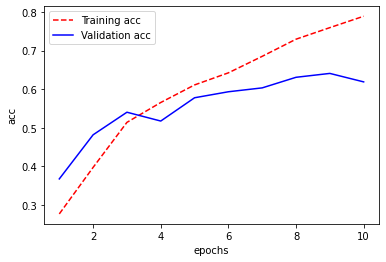

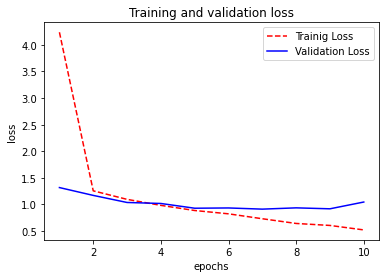

<Figure size 432x288 with 0 Axes>

In [63]:
epochs = range(1, len(acc)+1, 1)

plt.plot  (epochs, acc    , 'r--', label = 'Training acc')
plt.plot  (epochs, val_acc, 'b'  , label = 'Validation acc')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()
plt.plot (epochs, loss    , 'r--', label = 'Trainig Loss')
plt.plot (epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()